<a href="https://colab.research.google.com/github/znumunz/dataviz2025/blob/main/Copy_of_Visualize_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv('/content/drive/MyDrive/MyPython&DataViz2025/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv')
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


## แปลงค่า gender และ age range เป็นจำนวนจริง

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,287
Female,40


In [ ]:
df['Age range'].value_counts()

,count
Age range,
over 34,126
18-24,99
25-34,80
10-17,45
under 10,1


## dropna

In [18]:
df_dropna = df.dropna(subset =['Age range','Gender'])
df_dropna.shape

(318, 15)

In [6]:
set(df['Age range'])

{'10-17', '18-24', '25-34', nan, 'over 34', 'under 10'}

In [19]:
df_dropna = df.dropna(subset=['Age range', 'Gender']).copy()

def age_range_to_numeric(age_range):
    if age_range == 'under 10':
        return 10
    elif age_range == 'over 34':
        return 34
    else:
        try:
            lower, upper = map(int, age_range.split('-'))
            return (lower + upper) // 2
        except:
            return None # Handle any unexpected values

df_dropna['Age range'] = df_dropna['Age range'].apply(age_range_to_numeric)
display(df_dropna.head())

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,29,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [20]:
df_dropna['Gender'] = df_dropna['Gender'].replace({'Male': 35, 'Female': 1})
display(df_dropna.head())

/tmp/ipython-input-2880038579.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dropna['Gender'] = df_dropna['Gender'].replace({'Male': 35, 'Female': 1})


,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,35,29,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,35,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


## Scatter 2D

## scatter - default

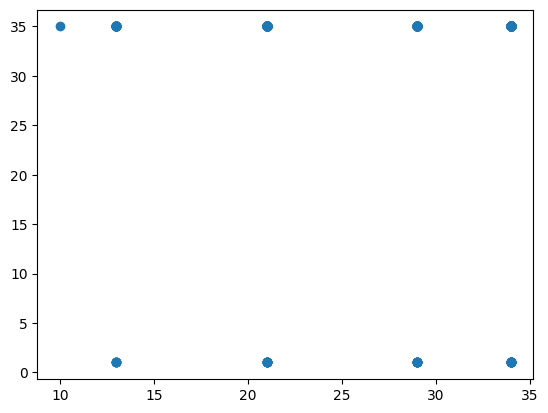

In [ ]:
plt.scatter(df_dropna['Age range'],df_dropna['Gender'])

In [10]:
import numpy as np

In [21]:
list_of_rn = np.random.normal(loc = 1, scale = 0.1, size = len(df))

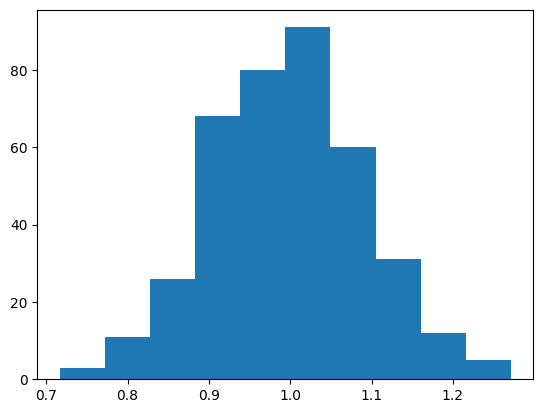

In [50]:
output = plt.hist(list_of_rn)

(array([ 3., 11., 26., 68., 80., 91., 60., 31., 12.,  5.]),
 array([0.7167732 , 0.77221117, 0.82764915, 0.88308713, 0.9385251 ,
        0.99396308, 1.04940105, 1.10483903, 1.160277  , 1.21571498,
        1.27115295]),
 <BarContainer object of 10 artists>)

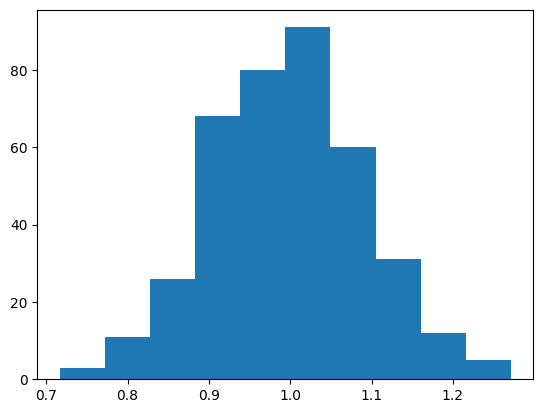

In [22]:
plt.hist(list_of_rn)

In [51]:
output

(array([ 3., 11., 26., 68., 80., 91., 60., 31., 12.,  5.]),
 array([0.7167732 , 0.77221117, 0.82764915, 0.88308713, 0.9385251 ,
        0.99396308, 1.04940105, 1.10483903, 1.160277  , 1.21571498,
        1.27115295]),
 <BarContainer object of 10 artists>)

In [52]:
output[0]

array([ 3., 11., 26., 68., 80., 91., 60., 31., 12.,  5.])

(array([ 3.,  6., 12., 40., 56., 71., 82., 57., 30., 18.,  9.,  3.]),
 array([0.7167732 , 0.76297151, 0.80916983, 0.85536814, 0.90156645,
        0.94776476, 0.99396308, 1.04016139, 1.0863597 , 1.13255801,
        1.17875633, 1.22495464, 1.27115295]),
 <BarContainer object of 12 artists>)

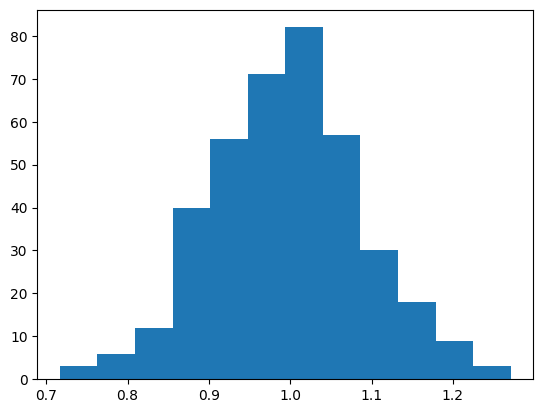

In [75]:
plt.hist(list_of_rn,bins=12)

In [23]:
df_dropna['Gender'] = df_dropna['Gender'] * list_of_rn[:len(df_dropna)]
display(df_dropna.head())

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,37.729340,29,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,30.938650,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,37.429650,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1.030605,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,33.929471,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


In [26]:
df_dropna['age range'] = df_dropna['Age range'] * list_of_rn[:len(df_dropna)]
display(df_dropna.head())

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,age range
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,37.729340,29,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False,31.261453
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,30.938650,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,11.491499
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,37.429650,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,13.902442
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1.030605,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,13.397866
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,33.929471,13,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,12.602375


In [ ]:
df_dropna['Age range'].describe()

,Age range
count,318.000000
mean,26.534591
std,7.490713
min,10.000000
25%,21.000000
50%,29.000000
75%,34.000000
max,34.000000


In [ ]:
df_dropna[df['Gender']]

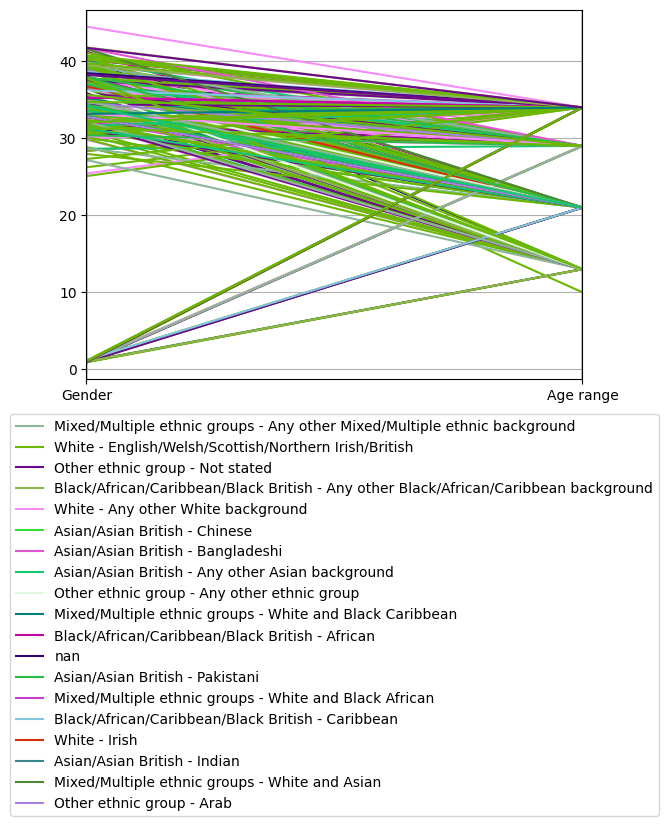

In [24]:
pd.plotting.parallel_coordinates(df_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

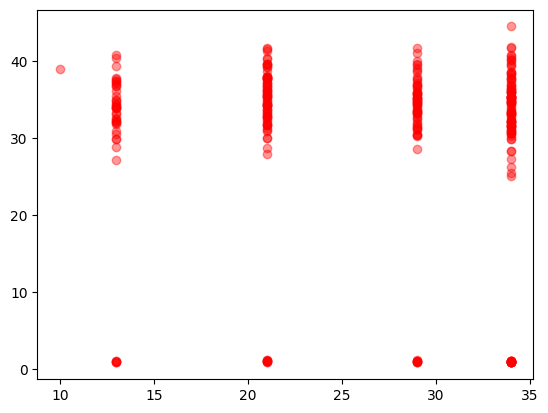

In [29]:
plt.scatter(df_dropna['Age range'],df_dropna['Gender'],c='r',alpha=0.4)

In [ ]:
## ใช้ค่าสีในการแสดงคอลัมน์อื่นๆ  ในตัวอย่างนี้จะใช้ คอลัมน์ officer define ethnicity

In [ ]:
color = df_dropna['Officer-defined ethnicity'] = df_dropna['Officer-defined ethnicity'].replace({'White': 3, 'Black': 0,'Asian':2,'Other':1})

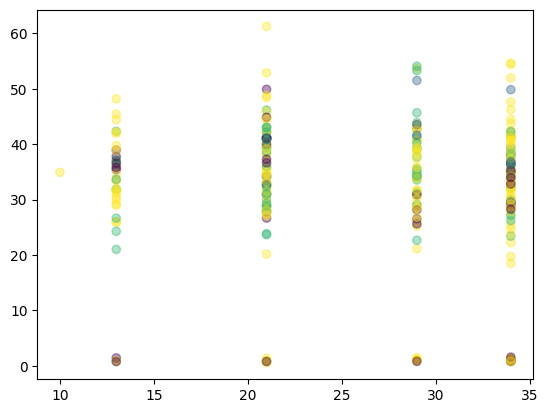

In [ ]:
plt.scatter(df_dropna['Age range'],df_dropna['Gender'],c=color,alpha=0.4)

## อ่าน data iris

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### color

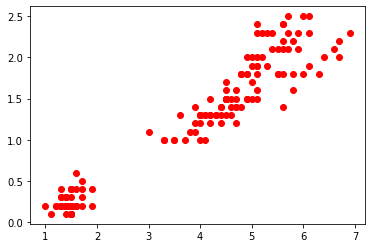

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c='r')

## ใส่สีให้แต่ละจุด

In [ ]:
set(df['Name']) #ดูว่ามีค่าอะไรบ้าง

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [40]:
df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2

/tmp/ipython-input-490463255.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


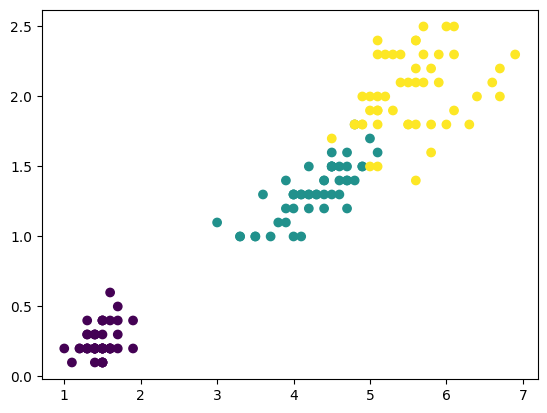

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'])

### alpha กำหนดความโปร่งแสง

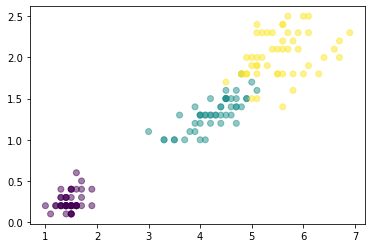

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

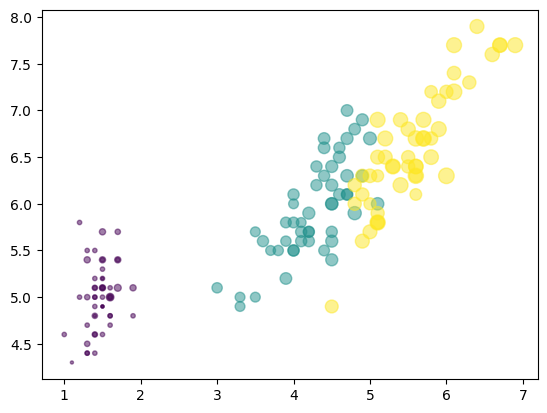

In [ ]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

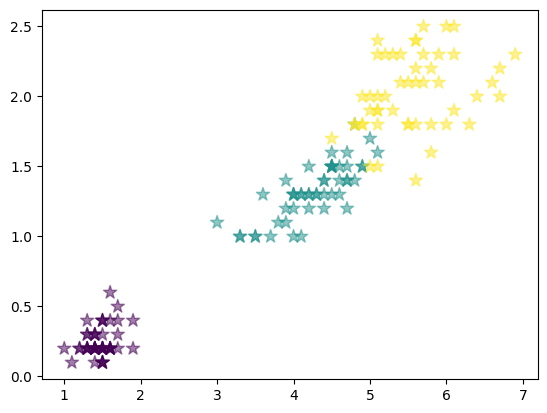

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

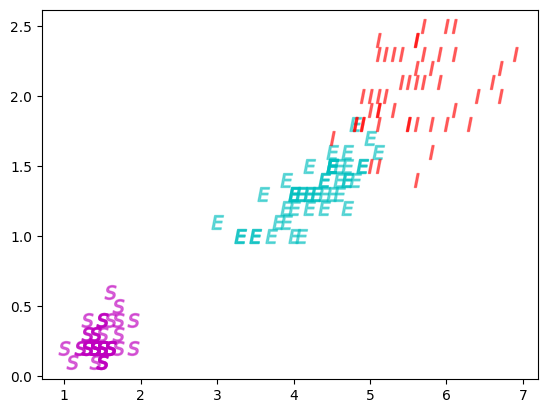

In [ ]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

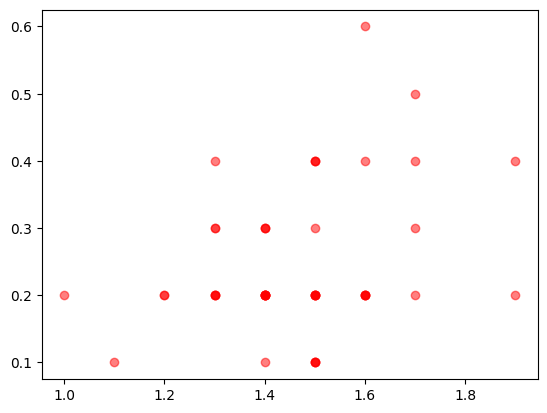

In [32]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

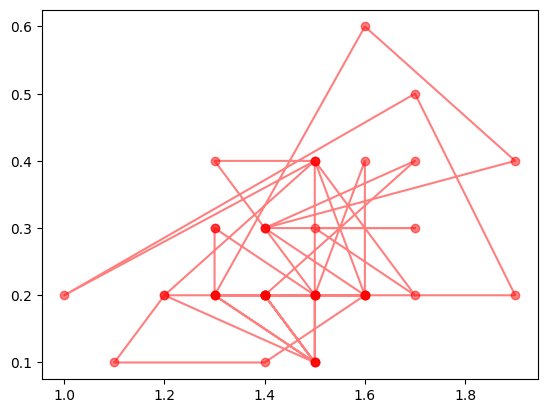

In [33]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

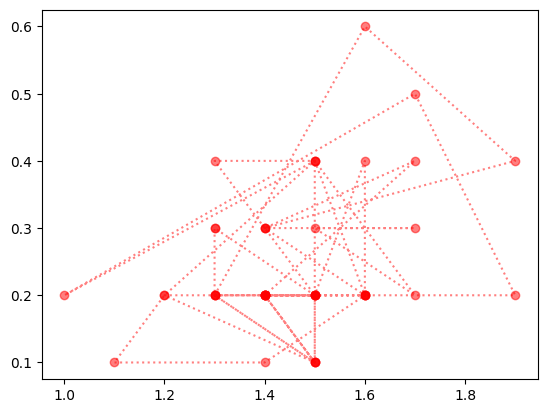

In [37]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

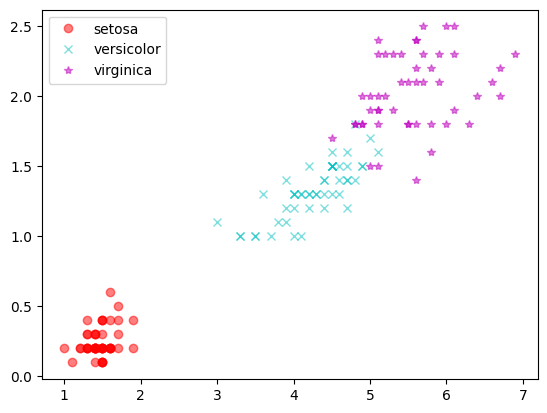

In [38]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

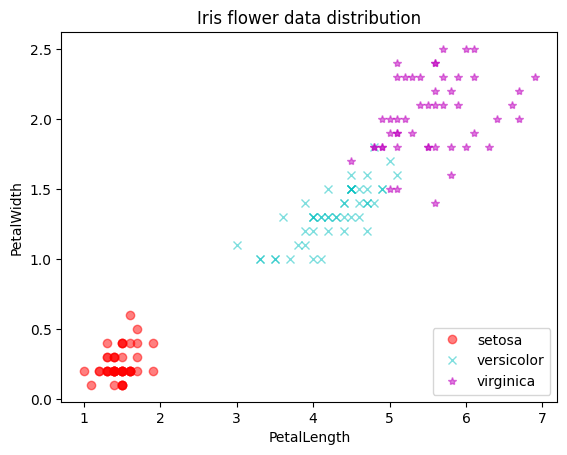

In [39]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

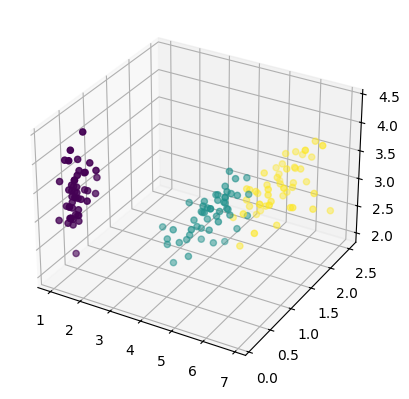

In [41]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

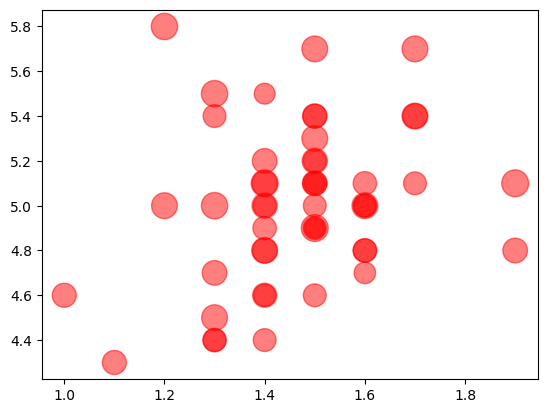

In [ ]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [87]:
df = pd.read_csv('/content/drive/MyDrive/MyPython&DataViz2025/Data/2025-01/2025-01-avon-and-somerset-outcomes.csv')

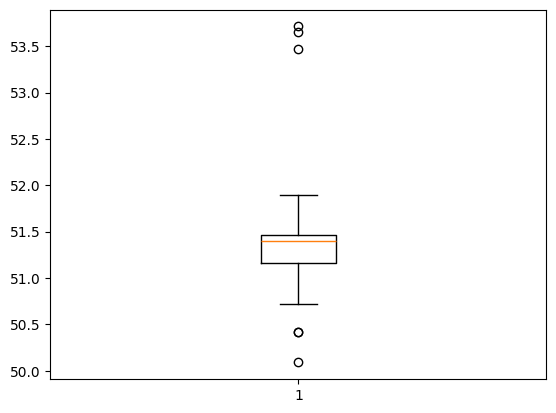

In [97]:
O = plt.boxplot(df['Latitude'].dropna())

In [99]:
O

{'whiskers': [<matplotlib.lines.Line2D at 0x780673aabfe0>,
 'caps': [<matplotlib.lines.Line2D at 0x78067387c950>,
 'boxes': [<matplotlib.lines.Line2D at 0x780673acacf0>],
 'medians': [<matplotlib.lines.Line2D at 0x78067387cd70>],
 'fliers': [<matplotlib.lines.Line2D at 0x78067387d010>],
 'means': []}

In [101]:
O['fliers']

In [102]:
O['fliers'][0]

In [103]:
dir(O['fliers'][0])

['_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiased',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_color',
 '_dash_pattern',
 '_dashcapstyle',
 '_dashjoinstyle',
 '_different_canvas',
 '_drawStyles_l',
 '_drawStyles_s',
 '_drawstyle',
 '_fully_clipped_to_axes',
 '_gapcolor',
 '_get_markerfacecolor',
 '_get_transformed_path',
 '_gid',
 '_in_layout',
 '_internal_update',
 '_invalidx',
 '_invalidy',
 '_label',
 '_lineStyles',
 '_linestyle',
 '_linestyles',
 '_linewidth',
 '_marker',
 '_markeredgecolor',
 '_markeredgewidth',
 '_markerfac

In [106]:
O['fliers'][0].get_ydata()

array([50.413382, 50.413382, 50.088681, 53.655907, 53.46954 , 53.712356])

In [130]:
df[df['Latitude'].isin(O['fliers'][0].get_ydata())]

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
1091,61b24aeabc4254b2c7af3b6ffd0f95b09a60bedbed1cc1...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-1.541758,53.655907,On or near Normanton Street,E01011801,Wakefield 031C,Action to be taken by another organisation
1417,5d6272ff22e302b729c9f777b2f3c6f69b8e3d546489f3...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.658276,53.469540,On or near Sherlock Avenue,E01006842,St. Helens 005D,Unable to prosecute suspect
1448,d6e294e73dfb2903c1e781cecd7cd9c234fb0e3330f5e0...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-4.159268,50.413382,On or near Haytor Close,E01015088,Plymouth 006C,Unable to prosecute suspect
1802,de89230d70d1140ab654310e5a117c313ce85e7cde2a42...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-4.159268,50.413382,On or near Haytor Close,E01015088,Plymouth 006C,Unable to prosecute suspect
4172,3393580ede815127c25a2ae1357d135ebea8c2b0182af5...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-1.510631,53.712356,On or near Springhills View,E01011897,Wakefield 008E,Unable to prosecute suspect
8312,7bb3aa9be5b1fa3529ad2170e750c29879df74e3798b19...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-5.686040,50.088681,On or near Parking Area,E01018992,Cornwall 069A,Unable to prosecute suspect


In [132]:
O['whiskers']

In [141]:
O['whiskers'][0].get_ydata()

array([51.165053, 50.722973])

In [151]:
O['caps'][0].get_ydata()

array([50.722973, 50.722973])

In [153]:
O['caps'][1].get_ydata()

array([51.896435, 51.896435])

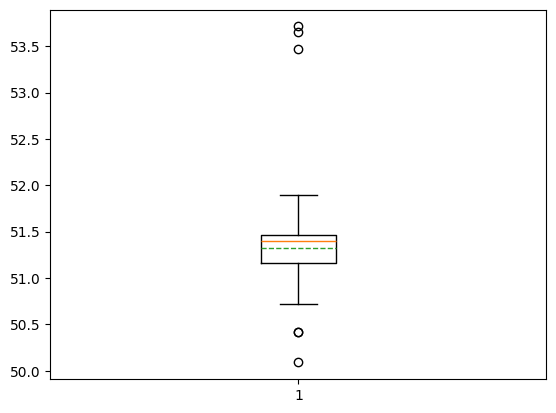

In [108]:
O = plt.boxplot(df['Latitude'].dropna(),showmeans=True,meanline=True)

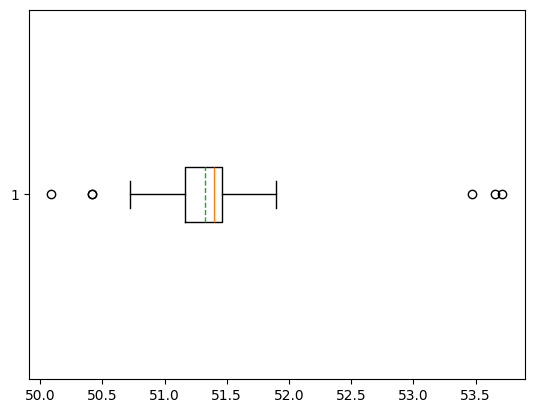

In [156]:
O = plt.boxplot(df['Latitude'].dropna(),showmeans=True,meanline=True,vert=False)

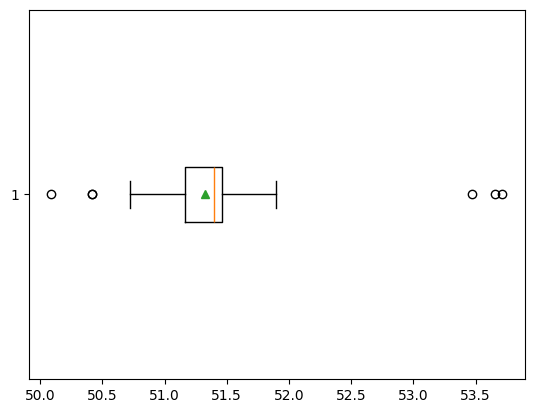

In [157]:
O = plt.boxplot(df['Latitude'].dropna(),showmeans=True,vert=False)

## Subplot

In [169]:
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,9a6df6be8891d0d563b6e3b8a805f221b134b8eda665ea...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.704043,51.387847,On or near Downside Road,E01014854,North Somerset 013D,Unable to prosecute suspect
1,0d99bdcd6594184d351f0513d71635162e9e4a756f1a79...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Further investigation is not in the public int...
2,ae2635027b0484e1ef028b833ba5a795a3f33104ac9c82...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.576637,51.459290,On or near Harleston Street,E01033358,Bristol 054D,Formal action is not in the public interest
3,d4250554f997530722b58740c8679665f3327de2e5b601...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,5fcb9a243ac6f29f7ef5bcf6d316d8936897ea315220ec...,2025-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


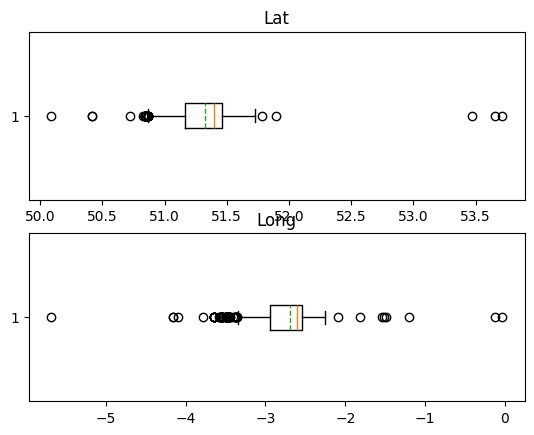

In [201]:
plt.subplot(2, 1, 1)
plt.boxplot(df['Latitude'].dropna(), whis=1, vert=False, showmeans=True, meanline=True)
plt.title('Lat')

plt.subplot(2, 1, 2)
plt.boxplot(df['Longitude'].dropna(), whis=1, vert=False, showmeans=True, meanline=True)
plt.title('Long');

# HW7 plot กราฟ แสดง การกระจายของข้อมูลใน india imdb และ มาพรีเซ็น เป็นกลุ่ม (2 กราฟ)

## plot กราฟ 3 อัน ในแนวทะแยงมุม
1. boxplot
2. scatter plot
3. histogram

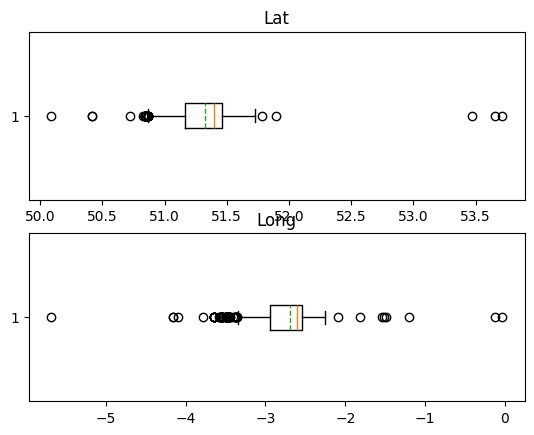

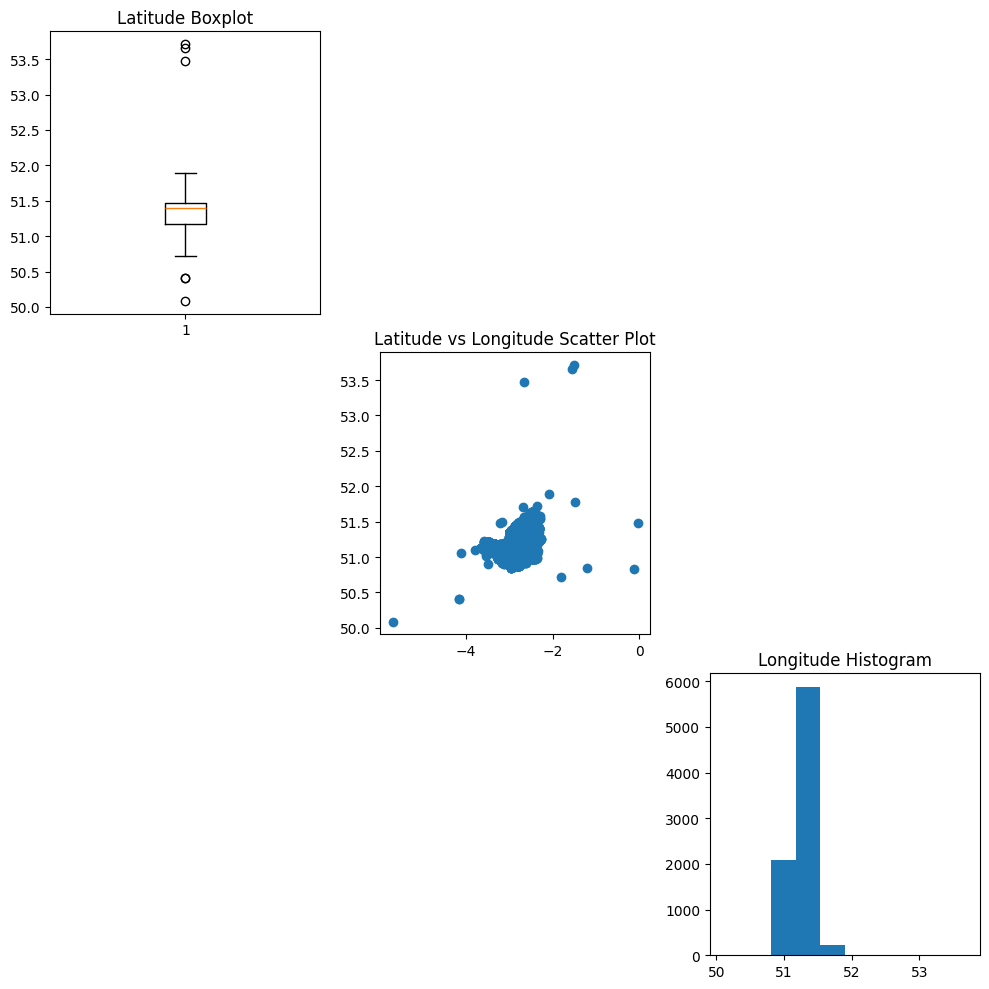

In [206]:
fig = plt.figure(figsize=(10, 10))

# Boxplot in the top-left corner
ax1 = fig.add_subplot(3, 3, 1)
ax1.boxplot(df['Latitude'].dropna())
ax1.set_title('Latitude Boxplot')

# Scatter plot in the middle
ax2 = fig.add_subplot(3, 3, 5)
ax2.scatter(df['Longitude'], df['Latitude'])
ax2.set_title('Latitude vs Longitude Scatter Plot')

# Histogram in the bottom-right corner
ax3 = fig.add_subplot(3, 3, 9)
ax3.hist(df['Latitude'].dropna())
ax3.set_title('Longitude Histogram')

plt.tight_layout()
plt.show()